In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.display import display
import sympy as spy
spy.init_printing()

In [3]:
omega, R, L, C = spy.symbols('\omega R L C', real = True, positive = True)

In [4]:
Zeq = 1j*omega*C + 1/(1j*omega*L)
Zeq = 1/(Zeq)

Zeq = Zeq + R

trans = (1/Zeq).simplify()

real, imag = trans.as_real_imag()
amplitude = spy.sqrt(real**2 + imag**2).simplify()
phase = spy.atan(imag/real).simplify()

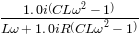

Amplitude


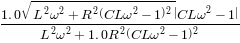

Phase


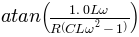

In [5]:
display(trans)
print('Amplitude')
display(amplitude)

print('Phase')
display(phase)

In [6]:
N = 100
freq = np.logspace(0, 8, N)
T_amp = np.zeros_like(freq)
T_pha = np.zeros_like(freq)
results = np.zeros_like(freq, dtype=complex)

substitutions = [(R, 1e3), (C, 1e-9), (L, 1e-6)]
amplitude = amplitude.subs(substitutions)
trans = trans.subs(substitutions)
phase = phase.subs(substitutions)
for (i,f) in enumerate(freq):
    T_amp[i] = float(amplitude.evalf(subs={omega:f*2*np.pi}))
    T_pha[i] = float(phase.evalf(subs={omega:f*2*np.pi}))
    results[i] = trans.evalf(subs={omega:f*2*np.pi})

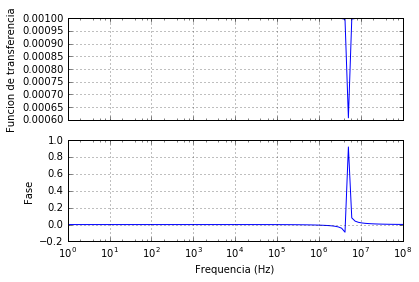

In [7]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(freq, T_amp)
ax1.set_ylabel("Funcion de transferencia")
ax1.set_xscale('log')
ax1.grid()

ax2.plot(freq, T_pha)
ax2.set_ylabel('Fase')
ax2.set_xlabel('Frequencia (Hz)')
ax2.grid()

In [8]:
V_0, T = spy.symbols('V_0 T', positive = True, real = True)

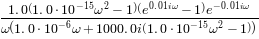

In [9]:
T = 10e-3
I = trans * 1j * (V_0/omega) * (spy.exp(-1j*omega*T)-1)
I = I.subs([(V_0, 1)])
display(I.simplify())

In [10]:
N = 1000
freq = np.linspace(1e1, 1e4, N)
results = np.zeros_like(freq, dtype=complex)

for (i,f) in enumerate(freq):
    temp = I.evalf(subs={omega : f*2*np.pi})
    results[i] = float(spy.re(temp)) + 1j*float(spy.im(temp))
    
results *= 1e3

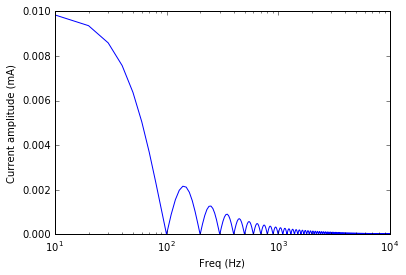

In [11]:
plt.plot(freq, abs(results), label = 'Amplitude')
plt.xscale('log')
plt.xlabel('Freq (Hz)')
plt.ylabel('Current amplitude (mA)')

In [12]:
time = np.linspace(0, 1, 1000)
temp = np.zeros_like(time, dtype=complex)

N = len(time)
n = np.arange(N)
for (j, i) in enumerate(time):
    value = sum(results*np.exp(2*np.pi*1j*freq*i/N))
    temp[j] = value/N

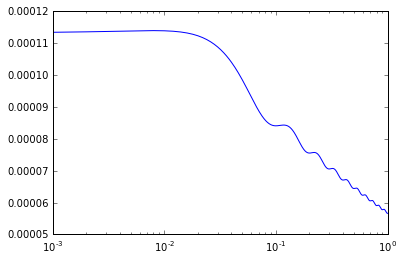

In [13]:
plt.plot(time, abs(temp))
plt.xscale('log')